In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sklearn.datasets as skds

In [3]:
X,y=skds.make_classification(n_features=2,
   n_informative=2, 
   n_redundant=0, 
   n_repeated=0,
   n_classes=2,
   n_clusters_per_class=1)

In [4]:
X.shape

(100, 2)

In [5]:
y.shape

(100,)

In [6]:
#y=y.reshape(-1,1)

In [7]:
y.shape

(100,)

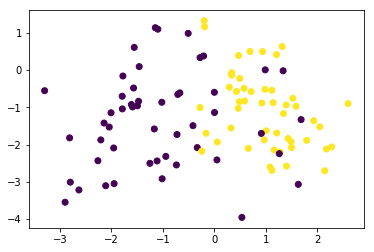

In [8]:
#plot the data points
plt.scatter(X[:,0],X[:,1],c=y,marker='o')
plt.show()

In [9]:
#convert into one hot encoded vectors using numpy
y[:5]


array([0, 1, 1, 1, 1])

In [10]:
y_hot_encoded=np.eye(N=len(y),M=2)[y]

In [11]:
y_hot_encoded.shape

(100, 2)

In [12]:
y_hot_encoded[:5]

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#split the data into train & Test
X_train,X_test,y_train,y_test=train_test_split(X,y_hot_encoded,test_size=0.4,random_state=123)

In [15]:
X_train.shape

(60, 2)

In [16]:
y_train.shape

(60, 2)

In [17]:
#Implement loss function
num_outputs=y_train.shape[1]
num_inputs=X_train.shape[1]

In [18]:
learning_rate=0.001

In [19]:
#Input Placeholders
x_tensor=tf.placeholder(shape=[None,num_inputs],name='x',dtype=tf.float32)
y_tensor=tf.placeholder(shape=[None,num_outputs],name='y',dtype=tf.float32)

In [20]:
#Model Parameters
w=tf.Variable(tf.zeros(shape=[num_inputs,num_outputs],name='w'))
b=tf.Variable(tf.zeros(shape=[num_outputs],name='b'))

In [21]:
model=tf.nn.sigmoid(tf.matmul(x_tensor,w)+b)

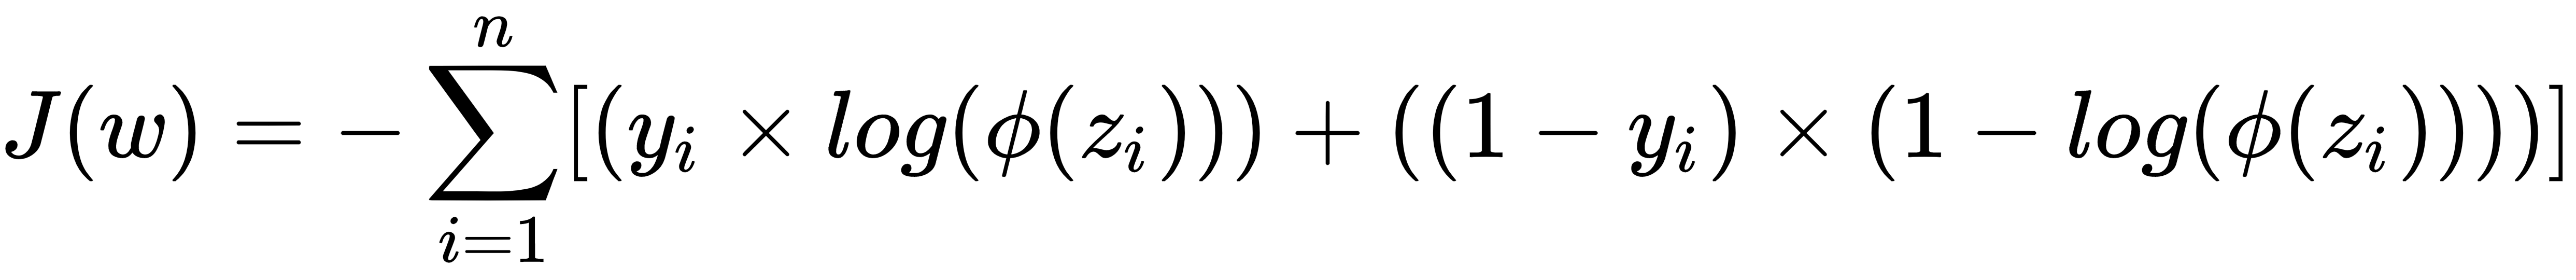

In [22]:
from IPython.display import Image
Image(filename='logloss.png')

In [23]:
#Implementing Log loss function
loss=tf.reduce_mean(-tf.reduce_sum((y_tensor*tf.log(model))+((1-y_tensor)*tf.log(1-model)),axis=1))

In [24]:
#declare the optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [25]:
#argmax function returns index of maximum value
#in the below case it returns index of max. value of model prediction ( 0,1), since its 2 column one hot encoded vector

In [26]:
#Build and run Classification model
num_epochs=1
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        tfs.run(optimizer,feed_dict={x_tensor:X_train,y_tensor:y_train})
        #axis=1 means along the rows 
        y_pred=tfs.run(tf.argmax(model,1),feed_dict={x_tensor:X_test})
        y_actual=tfs.run(tf.argmax(y_tensor,1),feed_dict={y_tensor:y_test})
        
        preds_check=tf.equal(y_pred,y_actual)
        accuracy=tf.reduce_mean(tf.cast(preds_check,tf.float32))
        accuracy_score=tfs.run(accuracy)
        
        print("Epoch number {0:} accuracy ={1:.8f}".format(epoch,accuracy_score))
        
        
        

Epoch number 0 accuracy =0.87500000


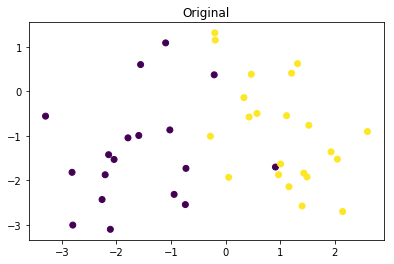

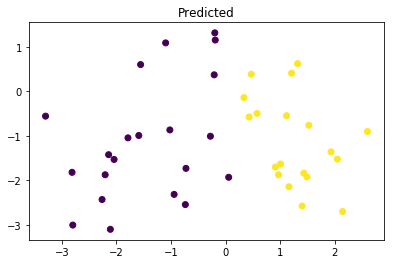

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0],X_test[:,1],marker='o',c=y_actual)
plt.title("Original")
plt.show()
plt.figure(figsize=(14,4))
plt.subplot(1,2,2)
plt.scatter(X_test[:,0],X_test[:,1],marker='o',c=y_pred)
plt.title("Predicted")
plt.show()
